# Splitting the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv("MSME_clean_trasformed.csv")
df1.head()

,Unnamed: 0,id,date,saving_ratio,debt_saving_ratio,default_flag,max_dpd_6_months,max_dpd_12_months,max_dpd_24_months,problematic_cheque_count,...,customer_profile_woe_encoded,customer_segment_woe_encoded,foreign_stakeholders_woe_encoded,other_debtors_woe_encoded,purpose_woe_encoded,revenue_range_woe_encoded,savings_woe_encoded,sector_woe_encoded,sector_risk_capped_0.99_woe_encoded,sme_history_begin_woe_encoded
0,0,1,2020-12-09,0.24,0.22,0,0,0,0.0,2,...,-0.122209,0.814519,0.03295,-0.002220,-0.402431,-0.028904,-0.683867,-0.452792,-0.001891,-0.229130
1,1,2,2021-08-07,0.28,0.26,1,0,30,0.0,0,...,-0.122209,0.401000,0.03295,-0.002220,-0.402431,-0.028904,0.269577,-0.452792,-0.001891,0.033635
2,2,3,2023-02-26,0.42,0.40,0,0,30,0.0,1,...,-0.122209,-1.161418,0.03295,-0.002220,0.611705,-0.058396,0.269577,-0.452792,-0.001891,-0.380269
3,3,4,2020-03-30,0.07,0.05,0,0,30,0.0,0,...,-0.122209,0.814519,0.03295,-0.519798,0.100762,-0.028904,0.269577,0.032576,-0.001891,-0.380269
4,4,5,2021-07-24,0.13,0.10,1,0,30,0.0,3,...,-0.122209,0.814519,0.03295,-0.002220,0.359709,-0.028904,0.269577,0.585677,-0.001891,0.033635


In [3]:
df1.isnull().sum()

Unnamed: 0                             0
id                                     0
date                                   0
saving_ratio                           0
debt_saving_ratio                      0
                                      ..
revenue_range_woe_encoded              0
savings_woe_encoded                    0
sector_woe_encoded                     0
sector_risk_capped_0.99_woe_encoded    0
sme_history_begin_woe_encoded          0
Length: 179, dtype: int64

### Date-based Splitting:

Uses a specified validation_date to split the dataset chronologically:

Data before validation_date forms the training and test sets.

Data on or after validation_date forms the validation set.

In [4]:
df1["date"].dtype

dtype('O')

In [5]:
df1["date"]=pd.to_datetime(df1["date"])

In [6]:
df1["date"].dtype

dtype('<M8[ns]')

In [7]:
from datetime import datetime

date = "2023-06-01"
format = "%Y-%m-%d"

# Convert the string to a datetime object
validation_date = datetime.strptime(date, format)

In [8]:
# Split  validation based on date
train_test_data = df1[df1['date'] < validation_date]
validation_data = df1[df1['date'] >= validation_date]
y=train_test_data["default_flag"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(train_test_data,y,test_size = 0.3,random_state =42)
# A regular train_test_split without stratification

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(594, 179)
(255, 179)
(594,)
(255,)


# Stratification
Stratification ensures that the class distribution within the training, validation, and test sets mirrors the class distribution of the original dataset. For instance, if a dataset has 80% class A and 20% class B, a stratified split will ensure that each subset also maintains this 80:20 ratio.

# Purpose:

Divides the dataset into three subsets:

Training set: Used to train the machine learning model.

Test set: Used to evaluate the model's performance and tune parameters.

Validation set: Used to perform a final evaluation after model selection and parameter tuning.

### Stratified Sampling:

Ensures that the distribution of months (year_month) is preserved in both train_data and test_data.

Importance: Helps maintain the representative nature of the dataset, particularly useful for time-series data.

Usage Considerations:

### Validation Date: 
Critical for defining the point at which data transitions from training/test to validation.

Random State: Controls the randomness of the split, influencing model performance evaluation consistency.
### Validation Set Importance:

Ensures an unbiased estimate of model performance on unseen data, crucial for assessing generalization capability before deployment

In [11]:
data=df1.copy()

In [12]:
# Add year_month column for stratification
df1['year_month'] = df1['date'].dt.to_period('M')
X_train,X_test,y_train,y_test=train_test_split(train_test_data,y,test_size = 0.3,random_state =42,stratify=train_test_data['year_month'])

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(594, 179)
(255, 179)
(594,)
(255,)


# Correlation and Multicollinearity
If two or more independent variables are highly correlated there individual impact on predicting the output variable can not be determined accurately.
Therefore it is necessary to eliminate columns from the dataset with high collinearity which can be decided based on a threshold value for cutoff.
To avoid any loss of data we shall also store the elimated variables in a list of columns

In [14]:
data.drop(["Unnamed: 0","id","year_month"],axis =1,inplace = True)
correlation_matrix=data.corr(numeric_only=True)
print(correlation_matrix)

# Since our dataset has 179 columns,plotting the correlation matrix is not useful 

                                     saving_ratio  debt_saving_ratio  \
saving_ratio                             1.000000           0.999991   
debt_saving_ratio                        0.999991           1.000000   
default_flag                             0.496870           0.496898   
max_dpd_6_months                         0.177233           0.177075   
max_dpd_12_months                        0.164969           0.164640   
...                                           ...                ...   
revenue_range_woe_encoded               -0.016365          -0.016460   
savings_woe_encoded                      0.055741           0.055597   
sector_woe_encoded                       0.034854           0.034780   
sector_risk_capped_0.99_woe_encoded           NaN                NaN   
sme_history_begin_woe_encoded            0.044506           0.044584   

                                     default_flag  max_dpd_6_months  \
saving_ratio                             0.496870          0.177

As in the following code we have removed the correlated columns from the data

Similar operations need to be done for training,test and validation data to remove any collinear columns

Removing collinearity makes the model more reliable,stable,efficient and realistic.

The following code removes the threshold values based on 2 parametres

1 Data

2 Correlation Threshold

Removes highly correlated variables above the given threshold.
   
Returns
    reduced_df (DataFrame): Dataset after removing correlated variables
    eliminated_columns (list): List of removed columns

In [15]:
def eliminate_correlated_variables(df, threshold):
    
    # Compute correlation matrix (absolute values)
    corr_matrix = data.corr().abs()

    # Upper triangle matrix (to avoid duplicate pairs)
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool) #used to extract the upper triangular portion of an array, setting all elements below a specified diagonal to zero. 
    ) # k  An optional integer offset for the diagonal(-1 Include diagnal and elements below ,0- includes main diagonal,1- Exclude main diagonal and Include elements above the main diagonal)

    # Identify columns to drop
    eliminated_columns = [
        column for column in upper_tri.columns
        if any(upper_tri[column] > threshold)
    ]

    # Create reduced dataset
    reduced_df = df.drop(columns=eliminated_columns)

    return reduced_df, eliminated_columns


In [16]:
# Function call on the dataset
credit_risk_data = data.copy()
threshold = 0.9
reduced_df, eliminated_columns = eliminate_correlated_variables(credit_risk_data, threshold)

print("Eliminated columns:", eliminated_columns)
print("Reduced dataset shape:", reduced_df.shape)


Eliminated columns: ['debt_saving_ratio', 'max_dpd_12_months', 'max_dpd_24_months', 'year', 'EBITDA_capped_0.99', 'Int_coverage_ratio_capped_0.99', 'Net_Profit_Margin_capped_0.99', 'ROA_capped_0.99', 'ROE_capped_0.99', 'Revenue_Growth_Rate_capped_0.99', 'average_credit_duration_capped_0.99', 'credit_amount_capped_0.99', 'credits_this_bank_capped_0.99', 'debt_saving_ratio_capped_0.99', 'default_flag_capped_0.99', 'duration_in_month_capped_0.99', 'installment_as_income_perc_capped_0.99', 'max_dpd_12_months_capped_0.99', 'max_dpd_24_months_capped_0.99', 'max_dpd_6_months_capped_0.99', 'people_under_maintenance_capped_0.99', 'present_res_since_capped_0.99', 'problematic_cheque_count_capped_0.99', 'saving_ratio_capped_0.99', 'boxcox_id', 'boxcox_saving_ratio', 'boxcox_duration_in_month', 'boxcox_installment_as_income_perc', 'boxcox_present_res_since', 'boxcox_average_credit_duration', 'boxcox_credits_this_bank', 'boxcox_people_under_maintenance', 'boxcox_EBITDA', 'boxcox_month', 'boxcox_EBI

In [17]:
reduced_df.shape # The number of columns have reduced to 72 from 179 intitially as the correlated columns hab=ve been removed

(1000, 72)

In [18]:
reduced_df

,date,saving_ratio,default_flag,max_dpd_6_months,problematic_cheque_count,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,average_credit_duration,...,credit_history_mean_encoded,customer_profile_mean_encoded,customer_segment_mean_encoded,other_debtors_mean_encoded,purpose_mean_encoded,savings_mean_encoded,sector_mean_encoded,sector_risk_capped_0.99_mean_encoded,sme_history_begin_mean_encoded,sector_risk_capped_0.99_woe_encoded
0,2020-12-09,0.24,0,0,2,6,1169,4,4,67,...,0.170648,0.275184,0.492701,0.299890,0.221429,0.174863,0.212766,NaN,0.252964,-0.001891
1,2021-08-07,0.28,1,0,0,48,5951,2,2,22,...,0.318868,0.275184,0.390335,0.299890,0.221429,0.359867,0.212766,NaN,0.306785,-0.001891
2,2023-02-26,0.42,0,0,1,12,2096,2,3,49,...,0.170648,0.275184,0.116751,0.299890,0.440000,0.359867,0.212766,NaN,0.224138,-0.001891
3,2020-03-30,0.07,0,0,0,42,7882,2,4,45,...,0.318868,0.275184,0.492701,0.192308,0.320442,0.359867,0.306034,NaN,0.224138,-0.001891
4,2021-07-24,0.13,1,0,3,24,4870,3,4,53,...,0.318182,0.275184,0.492701,0.299890,0.380342,0.359867,0.435065,NaN,0.306785,-0.001891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-08-14,0.29,0,0,3,12,1736,3,4,31,...,0.318868,0.275184,0.116751,0.299890,0.320442,0.359867,0.212766,NaN,0.224138,-0.001891
996,2023-01-12,0.06,0,0,0,30,3857,4,4,40,...,0.318868,0.275184,0.492701,0.299890,0.165049,0.359867,0.306034,NaN,0.306785,-0.001891
997,2023-07-28,0.39,0,0,3,12,804,4,4,38,...,0.318868,0.275184,0.116751,0.299890,0.221429,0.359867,0.307229,NaN,0.252964,-0.001891
998,2023-07-31,0.31,1,0,2,45,1845,4,4,23,...,0.318868,0.275184,0.492701,0.299890,0.221429,0.359867,0.435065,NaN,0.306785,-0.001891


In [19]:
train_data = X_train.copy()
train_data.shape

(594, 179)

In [20]:
threshold = 0.7
train_data_corr_eliminated, eliminated_columns = eliminate_correlated_variables(train_data, threshold)

print("Eliminated columns:", eliminated_columns)
print("Reduced dataset shape:", train_data_corr_eliminated.shape)

Eliminated columns: ['debt_saving_ratio', 'max_dpd_12_months', 'max_dpd_24_months', 'year', 'EBITDA_capped_0.99', 'Int_coverage_ratio_capped_0.99', 'Net_Profit_Margin_capped_0.99', 'ROA_capped_0.99', 'ROE_capped_0.99', 'Revenue_Growth_Rate_capped_0.99', 'average_credit_duration_capped_0.99', 'credit_amount_capped_0.99', 'credits_this_bank_capped_0.99', 'debt_saving_ratio_capped_0.99', 'default_flag_capped_0.99', 'duration_in_month_capped_0.99', 'installment_as_income_perc_capped_0.99', 'max_dpd_12_months_capped_0.99', 'max_dpd_24_months_capped_0.99', 'max_dpd_6_months_capped_0.99', 'people_under_maintenance_capped_0.99', 'present_res_since_capped_0.99', 'problematic_cheque_count_capped_0.99', 'saving_ratio_capped_0.99', 'boxcox_id', 'boxcox_saving_ratio', 'boxcox_duration_in_month', 'boxcox_credit_amount', 'boxcox_installment_as_income_perc', 'boxcox_present_res_since', 'boxcox_average_credit_duration', 'boxcox_credits_this_bank', 'boxcox_people_under_maintenance', 'boxcox_EBITDA', 'bo

In [21]:
train_data_corr_eliminated.isnull().sum()

Unnamed: 0                                0
id                                        0
date                                      0
saving_ratio                              0
default_flag                              0
                                       ... 
business_type_mean_encoded                0
other_debtors_mean_encoded                0
purpose_mean_encoded                      0
sector_risk_capped_0.99_mean_encoded    594
sector_risk_capped_0.99_woe_encoded       0
Length: 66, dtype: int64

In [22]:
# Since there is only one column with NaN values in the train_data_corr_eliminated, We shall drop the column
train_data_corr_eliminated.drop("sector_risk_capped_0.99_mean_encoded",axis =1,inplace =True)
train_data_corr_eliminated.isnull().sum()

Unnamed: 0                             0
id                                     0
date                                   0
saving_ratio                           0
default_flag                           0
                                      ..
sme_history_begin_new company          0
business_type_mean_encoded             0
other_debtors_mean_encoded             0
purpose_mean_encoded                   0
sector_risk_capped_0.99_woe_encoded    0
Length: 65, dtype: int64

In [23]:
train_data_corr_eliminated.shape

(594, 65)

In [24]:
validation_data_corr_eliminated = validation_data[train_data_corr_eliminated.columns]
validation_data_corr_eliminated.isnull().sum()

Unnamed: 0                             0
id                                     0
date                                   0
saving_ratio                           0
default_flag                           0
                                      ..
sme_history_begin_new company          0
business_type_mean_encoded             0
other_debtors_mean_encoded             0
purpose_mean_encoded                   0
sector_risk_capped_0.99_woe_encoded    0
Length: 65, dtype: int64

In [25]:
validation_data_corr_eliminated.shape

(151, 65)

In [26]:
test_data=X_test.copy()
test_data_corr_eliminated=test_data[train_data_corr_eliminated.columns]

In [27]:
test_data_corr_eliminated.shape

(255, 65)

As we can see we have successfully created a validation data based on cut-off date parameter out of the existing dataset.
We have eliminated correlated variables from the dataset using the np.triu function and reduced the dataset size.
Similarly we have exucuted the same function to remove the correlated variables in the stratified train,test and split data.
As we can observe the num of rows for train+test =999 which is as it should be after excluding the header along with 67 columns
whoch is infact a comparatively smaller data to be used in training machine learning model.
This approach is very usefull specially when our dataset is large in size and we have correlated features

# Information_Value

Information Value (IV) measures the predictive power of an independent variable in relation to the dependent variable (usually a binary outcome like default vs. non-default). It quantifies the strength of association between a variable and the outcome by assessing the difference in distributions between "good" and "bad" categories. Higher IV values indicate stronger predictive power of the variable and hence aids feature selection for the best model performance.IV distinguishes predictors in terms of prediction strength of distinguishing defaulters from non defaulters and model improvement removes weak predictors to enhance model performance. Preditive power of a variable is based on its distribution between the good and bad segments.

IV helps in variable selection by identifying variables that are most predictive of the outcome, making it a crucial metric in feature selection and credit scoring applications.

To calculate Information Value we will define the IV_calc Function with three  Parameters:

- data (DataFrame): The dataset.
    
 - default_flag (str or numeric): The name of the default flag variable.
    
- variable (str): The name of the variable for which IV is to be calculated.

Returns:
float: The calculated Information Value (IV).

In [28]:
# User Defined function to aid reusability on each of the features in the dataset we define function IV_calc as below
def IV_calc(data, default_flag, variable):
   
    # Split the dataset into "good" (good) and "bad" (bad) based on the default_flag variable
    good = data[data[default_flag] == 0]
    bad = data[data[default_flag] == 1]
    
    # Compute the frequency of each unique value of variable in both good and bad datasets (x and y respectively).
    x = good[variable].value_counts().to_frame().reset_index() # Creates a Dataframe x with Variable name and there values counts for good(0's) 
    x.columns = ['Var1', 'Freq.x']# Assigns the columns name to the columns
    y = bad[variable].value_counts().to_frame().reset_index()# Creates a Dataframe y with Variable name and there values counts for bad(1's)
    y.columns = ['Var1', 'Freq.y']# Assigns the columns name to the columns

    print("\nCounts for variable", variable, "in good data:")
    print(x)
    print("\nCounts for variable", variable, "in bad data:")
    print(y)
    # Merge the frequency counts (x and y) based on the unique values of variable
    merged = pd.merge(x, y, on="Var1", how="outer") # merges the two dataframes on a aommin key var1 
    # Compute the percentage of each unique value within good and bad datasets.
    merged['percentx'] = merged['Freq.x'] / merged['Freq.x'].sum() # percentage of goods(0's) out of total(good's+bad's) for all Freq.x values
    merged['percenty'] = merged['Freq.y'] / merged['Freq.y'].sum() # percentage of bads(0's) out of total(good's+bad's) for all Freq.x values

    print("\nMerged data:")
    print(merged)
    # Calculate the Information Value (IV) using the formula.
    merged['IV'] = (merged['percentx'] - merged['percenty']) * np.log(merged['percentx'] / merged['percenty'])
    # Summarize the IV for the variable.
    IV_RESULT = merged['IV'].sum() 

    print("\nIV for variable", variable, ":", IV_RESULT)

    return IV_RESULT # Returns the calculated Information Value (IV) for the specified variable


    

Calculate the Information Value (IV) for each variable in the dataset.

    Parameters:
    - data (DataFrame): The dataset containing variables for IV calculation
    - default_flag (str or numeric): The name of the default flag variable.

    Returns:
    DataFrame: DataFrame containing variables and their corresponding IVs.

In [29]:
# Calling the function for each of the features except default_flag and appending the variables in one columns and there information values in second columns of a summary dataframe.
# This user defined function is created beecause we have to repeatedly use the function of the training, test and validation data.
def IV_calc_data(data, default_flag): 
    iv_column_names = [] #Initializes lists to store variable names (iv_column_names) and their corresponding IVs (Information_Values)
    Information_Values = [] 

    # Computes the Information Value (IV) for each variable in the dataset except the default_flag variable
    for column in data.columns: 
        if column != default_flag: # Iterates through each column in data (excluding default_flag).
            iv = IV_calc(data, default_flag, column)# Calls IV_calc function to compute IV for each variable.
            iv_column_names.append(column)           
            Information_Values.append(iv)            # Appends variable names and their IVs to respective lists
    
    
    iv_summary = pd.DataFrame({'Variable': iv_column_names, 'IV': Information_Values}) # Constructs a DataFrame (iv_summary) containing variables and their calculated IVs.
    iv_summary = iv_summary[iv_summary['Variable'] != default_flag].reset_index(drop=True)# Filters out the default_flag variable from the summary.

    return iv_summary # Returns a DataFrame (iv_summary) with variables and their corresponding IVs.

iv_results = IV_calc_data(train_data_corr_eliminated,"default_flag")
iv_results


Counts for variable Unnamed: 0 in good data:
     Var1  Freq.x
0     455       1
1      25       1
2     836       1
3      82       1
4     432       1
..    ...     ...
409     8       1
410   650       1
411   567       1
412   453       1
413   342       1

[414 rows x 2 columns]

Counts for variable Unnamed: 0 in bad data:
     Var1  Freq.y
0     789       1
1     405       1
2     557       1
3     849       1
4     790       1
..    ...     ...
175   935       1
176   981       1
177   364       1
178   862       1
179   315       1

[180 rows x 2 columns]

Merged data:
     Var1  Freq.x  Freq.y  percentx  percenty
0       1     NaN     1.0       NaN  0.005556
1       2     1.0     NaN  0.002415       NaN
2       3     1.0     NaN  0.002415       NaN
3       4     NaN     1.0       NaN  0.005556
4       7     1.0     NaN  0.002415       NaN
..    ...     ...     ...       ...       ...
589   987     1.0     NaN  0.002415       NaN
590   992     1.0     NaN  0.002415       NaN
5

,Variable,IV
0,Unnamed: 0,0.000000
1,id,0.000000
2,date,0.131081
3,saving_ratio,0.488495
4,max_dpd_6_months,0.014473
...,...,...
59,sme_history_begin_new company,0.022271
60,business_type_mean_encoded,0.117372
61,other_debtors_mean_encoded,0.082947
62,purpose_mean_encoded,0.198110


In [30]:

iv_results.max()

Variable    year_month
IV            0.675982
dtype: object

In [31]:
iv_results.min()

Variable    EBITDA
IV             0.0
dtype: object

In [32]:
iv_results_sorted = iv_results.sort_values(by='IV', ascending=False)
iv_results_sorted

,Variable,IV
19,Net_Profit_Margin,0.675982
18,Int_coverage_ratio,0.544181
3,saving_ratio,0.488495
21,year_month,0.411398
17,Revenue_Growth_Rate,0.407015
...,...,...
0,Unnamed: 0,0.000000
1,id,0.000000
23,boxcox_year,0.000000
22,id_capped_0.99,0.000000


In [33]:
filtered_iv_results =iv_results_sorted[iv_results_sorted['IV'] > 0.2]
filtered_iv_results

,Variable,IV
19,Net_Profit_Margin,0.675982
18,Int_coverage_ratio,0.544181
3,saving_ratio,0.488495
21,year_month,0.411398
17,Revenue_Growth_Rate,0.407015
10,average_credit_duration,0.343678
15,ROE,0.336657
6,duration_in_month,0.285615
33,customer_segment_micro_sme,0.257238
16,ROA,0.206724


# Univariate GINI

The Gini coefficient measures the inequality among values of a frequency distribution. In the context of predictive modeling:
The Gini coefficient in logistic regression measures a model's discriminatory power.
The Gini coefficient ranges from -1 to 1= (2* AUROC)-1

1 indicates perfect discriminatory power (all predicted probabilities are either 0 or 1).
0 indicates no discriminatory power (model performance is equivalent to random guessing).
Negative values suggest worse than random predictions.
Gini coefficients help in identifying variables that are most discriminative of the outcome variable (default_flag in this case), making it a valuable tool for feature selection and model evaluation in credit scoring and risk assessment.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


Calculate the Gini coefficient from the estimated values calculated by logistic regression for each variable in the dataset.

Parameters:
- data (DataFrame): The dataset.
- default_flag (str): The name of the default flag variable.

Returns:
DataFrame: DataFrame containing variables and their corresponding Gini values.


In [35]:
def Gini_univariate_data(data, default_flag): # User Defined Function to calculate the GINI values
    gini_values = []
    variable_names = []

    for column in data.columns:
        if column != default_flag:
            X = data[[column]]
            y = data[default_flag]

            # Fit logistic regression model
            model = LogisticRegression(solver='liblinear')
            model.fit(X, y)

            # Predict probabilities for the default or bad cases
            y_pred = model.predict_proba(X)[:, 1]

            # Calculate Gini coefficient
            gini_value = 2 * roc_auc_score(y, y_pred) - 1

            # Append variable name and Gini value to lists
            variable_names.append(column)
            gini_values.append(gini_value)

    # Create DataFrame from lists
    gini_df = pd.DataFrame({'Variable': variable_names, 'Gini': gini_values})

    # Sort DataFrame by Gini values in descending order
    ordered_gini_df = gini_df.sort_values(by='Gini', ascending=False)

    # Reset index
    ordered_gini_df.reset_index(drop=True, inplace=True)

    return ordered_gini_df


In [36]:
# Drop 'date',"year_month"  column and calculate Gini coefficient over the training data

gini_result = Gini_univariate_data(train_data_corr_eliminated.drop(["date","year_month"],axis =1), "default_flag")
filtered_gini_result = gini_result[gini_result['Gini'] > 0.3]

# Display the filtered DataFrame
filtered_gini_result

,Variable,Gini
0,Net_Profit_Margin,0.870867
1,ROA,0.716787
2,sector_risk,0.637024
3,ROE,0.524007
4,saving_ratio,0.496444


Netprofit margin implies highest GINI  coefficient and hence strong discrimnatory power follower by ROA and Sector_risk and so on

# COX Proportionate Hazard model

The Cox Proportional Hazards Model, often just called the Cox model, is a statistical technique used in survival analysis. It helps us understand how different factors affect the time it takes for an event to happen. The “event” could be anything: death, equipment failure, customer churn,loan default etc.
Survival analysis is used to study time-to-event data. For example:

How long does a patient survive after treatment?
How many months does a customer stay subscribed before leaving?
How long until a machine breaks down?
In this context:

Survival time means the time until the event occurs

Censoring happens when we don't see the event before the end of the study (e.g., the customer hasn’t left yet).

the Cox model answers this key question:

How does each variable (like age, gender, income, etc.) affect the risk of the event happening at any point in time?

survival_function is derived from the baseline hazard function computed using the model parameters and feature values.
PD = 1- Survival_function
PD lies in the range[0,1] facilitates interpretation and comparison across different predictions.

BASELINE HAZARD FUNCTION =h(t∣X)=h0(T).e^B1X1+B2X2+B3X3+......+BnXn
If B is the coefficents of the covariates X,b>0 increases hazarard risk,b<0 decreases hazard risk
e^B>1 Higher Risk
e^B=1 No effect
e^B<1 Lower Risk

Key Concepts:

Survival Analysis: Analytical techniques used to predict the time until an event of interest occurs.

Hazard Function: Instantaneous rate of occurrence of an event at a given time, conditioned on survival up to that time.

Proportional Hazards Assumption: Assumes that the hazard ratio between any two individuals is constant over time, given their covariates.

In [37]:
#make a copy of the train,test and validation data for traing the cph model 
train_data_survival = train_data_corr_eliminated.copy()
test_data_survival = test_data_corr_eliminated.copy()
validation_data_survival = validation_data_corr_eliminated.copy()

In [38]:
from lifelines import CoxPHFitter

# Prepare the data:- For determining the basline hazard we need our data,duration column contains gives numerical values,event columns that is basically 
# the default flag and the set of features  over which our model shall be fitted

#1- Data Prep
def prepare_data(data, duration_col, event_col, features):
    data=data.copy() # [ This shall contain copies of the train_data_correlation_eliminated, test_data_correlation_eliminated,validation_data_correlation_eliminated)

# Creating a numerical column for duration.In our dataset we have the loan disbursment date in the column which has already been processed into date,year,month and year_month columns.
# For the duration_col we shall use the year_month column.First we shall find the unique values in the column and store it in a variable unique_year_months column as a list.
# Then we shall map the year_month column to the list the unique_year_month column to assign the unique indexes through iterating over each value in the column and store it in a duration_col column
# In this way we shall be left with only the unique index numerical values in the duration_col column which we shall finally store in the year_month colmn using mapping.
    unique_year_months = data[duration_col].unique()
    year_month_map = {month: i for i, month in enumerate(unique_year_months)}
    
    data['year_month'] = data[duration_col].map(year_month_map)
    data=data[Features+["year_month",event_col]]# event_col is the default_flag column
    return data

    

In [39]:
# Next we shall define the function for training our CoxPHFitter model on the data.
def train_survival_model(data,features,duration_col,event_col):
    #call the prepare_data function to first prepare the data for CoxPHFitter
    data=prepare_data(data,duration_col,event_col,features)
    cph=CoxPHFitter()
    cph.fit(data,duration_col,event_col,features)
    return cph

In [40]:
#Function Call on the training data
# Feature selection based on gini output
Features = ["Net_Profit_Margin","ROA","sector_risk","ROE","saving_ratio"]
duration_col="year_month"
event_col="default_flag"
# Train the survival model on train_data
cph_model = train_survival_model(train_data_survival, Features,duration_col,event_col)

Iteration 1: norm_delta = 9.28e-01, step_size = 0.9500, log_lik = -974.44734, newton_decrement = 1.54e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.55e-01, step_size = 0.9500, log_lik = -825.06994, newton_decrement = 1.17e+01, seconds_since_start = 0.3
Iteration 3: norm_delta = 2.33e-01, step_size = 0.9500, log_lik = -812.27007, newton_decrement = 1.05e+00, seconds_since_start = 0.3
Iteration 4: norm_delta = 2.91e-02, step_size = 1.0000, log_lik = -811.14973, newton_decrement = 1.37e-02, seconds_since_start = 0.3
Iteration 5: norm_delta = 3.78e-04, step_size = 1.0000, log_lik = -811.13587, newton_decrement = 2.32e-06, seconds_since_start = 0.3
Iteration 6: norm_delta = 6.35e-08, step_size = 1.0000, log_lik = -811.13587, newton_decrement = 6.57e-14, seconds_since_start = 0.3
Convergence success after 6 iterations.


In [41]:
# Defining a function to predict PD using the COXPHFitter model
def predict_pd(data,duration_col,event_col,Features,model):
# First prepare the test data by calling the prepare data function 
    prepare_data(data,duration_col,event_col,Features)
    # Predict the survival function
    survival_function=model.predict_survival_function(data).T
    #Calculate PD values over Survival Function
    PD_values=1-survival_function.iloc[:,-1]
    # Scaling the pd values between 0 and 1
    PD_values_scaled = (PD_values - PD_values.min()) / (PD_values.max() - PD_values.min())
    data["PD_cph"]=PD_values_scaled.values
    return data

In [42]:
# Predict PD on train_data, test_data, and validation_data
Features = ["Net_Profit_Margin","ROA","sector_risk","ROE","saving_ratio"]
event_col="default_flag"
duration_col="year_month"
model=cph_model
train_data_with_pd = predict_pd(train_data_survival,duration_col,event_col, Features,model)
test_data_with_pd = predict_pd(test_data_survival,duration_col,event_col, Features,model)
validation_data_with_pd = predict_pd(validation_data_survival,duration_col,event_col, Features,model)

In [43]:
# UDF for getting model coefficients
def get_model_coeff(model):
    coefficients=model.params_
    intercept=model.baseline_hazard_
    return coefficients,intercept

In [44]:
coefficients, intercept = get_model_coeff(cph_model)
print(coefficients)
print(intercept)
# Display the resulting datasets with PD values
# print(train_data_with_pd.head())
test_data_with_pd.head()
# test_data_with_pd.head()

covariate
Net_Profit_Margin    0.041587
ROA                  0.010448
sector_risk          0.168348
ROE                  0.006087
saving_ratio         0.214596
Name: coef, dtype: float64
      baseline hazard
0.0          0.000809
1.0          0.001225
2.0          0.001257
3.0          0.002590
4.0          0.003519
5.0          0.002792
6.0          0.001936
7.0          0.002471
8.0          0.002537
9.0          0.002092
10.0         0.002702
11.0         0.003919
12.0         0.001213
13.0         0.003097
14.0         0.005826
15.0         0.002099
16.0         0.003632
17.0         0.003097
18.0         0.003186
19.0         0.001708
20.0         0.000870
21.0         0.003545
22.0         0.003687
23.0         0.005856
24.0         0.004165
25.0         0.004439
26.0         0.003682
27.0         0.007823
28.0         0.007313
29.0         0.008078
30.0         0.009348
31.0         0.016391
32.0         0.013671
33.0         0.009633
34.0         0.007256
35.0         0.008092

,Unnamed: 0,id,date,saving_ratio,default_flag,max_dpd_6_months,problematic_cheque_count,duration_in_month,credit_amount,installment_as_income_perc,...,sector_Real Estate,sme_history_begin_... < 1 year,sme_history_begin_1 <= ... < 4 years,sme_history_begin_4 <= ... < 7 years,sme_history_begin_new company,business_type_mean_encoded,other_debtors_mean_encoded,purpose_mean_encoded,sector_risk_capped_0.99_woe_encoded,PD_cph
828,828,829,2020-06-27,0.15,1,0,0,36,8335,3,...,0.0,0.0,0.0,0.0,0.0,0.407407,0.29989,0.165049,-0.001891,0.988274
321,321,322,2022-02-10,0.64,1,0,1,24,1938,4,...,0.0,1.0,0.0,0.0,0.0,0.260870,0.29989,0.221429,-0.001891,0.986574
493,493,494,2020-08-06,0.49,0,0,3,6,368,4,...,0.0,0.0,0.0,0.0,0.0,0.260870,0.29989,0.221429,-0.001891,0.209869
835,835,836,2023-02-16,0.67,1,0,2,12,1082,4,...,0.0,0.0,1.0,0.0,0.0,0.260870,0.29989,0.380342,-0.001891,0.868957
923,923,924,2022-01-30,0.46,0,0,2,12,2002,3,...,0.0,0.0,0.0,1.0,0.0,0.391061,0.29989,0.380342,-0.001891,0.024947


    -In a Cox Proportional Hazards (PH) model, interpretations focus on the coefficients (β) and hazard ratios (exp(β)). 
    Unlike standard linear regression, there is no explicit intercept term in the traditional sense. 
    -1. Intercept: The "Baseline Hazard" The Cox model does not have a single constant intercept because the "baseline" is represented by a baseline hazard function, denoted as \(h_{0}(t)\). 
      -It represents the risk of the event occurring at time t when all predictors (covariates) are equal to zero.
      - It varies over time, it is often left unspecified (non-parametric) during model fitting, which is why the model is called "semi-parametric".
    -Role: Any constant intercept that would have been in the model is mathematically absorbed into this baseline hazard. 
    2. Coefficients (β) The coefficients are the values estimated by the model for each predictor. They are on a log-hazard scale. Direction of -  Effect:(beta >0): Increasing the predictor increases the hazard (risk), leading to shorter survival.
    (beta <0): Increasing the predictor decreases the hazard (risk), indicating a "protective" effect and longer survival.
    (beta =0): The predictor has no effect on the hazard. 3. Hazard Ratios (exp(beta )) Exponentiating the coefficient ((exp (beta )) gives the Hazard Ratio (HR), which is the most common way to report results because it is on an intuitive multiplicative scale. 
    -For Continuous Variables: The HR represents the multiplicative change in risk for every one-unit increase in the predictor.
    Example: If (exp (beta )=1.05) for an numerical independent continuous variable, each additional year increases the risk of the event by 5%.
    For Categorical Variables: The HR compares the "exposed" group to a reference category.
    Example: If treatment A (reference) is compared to treatment B and the HR is 1.50, then group B has a 50% higher risk of the event than group A at any given time.

# Applying Logistic Regression to Predict PD

Input Parameters
1-Data
2_Features
3_Target Variable

In [45]:
# Extract the specified features and the target variable based on the Uni Variate GINI 
features = ["Net_Profit_Margin","ROA","sector_risk","ROE","saving_ratio"]
X = data[features]
y = data["default_flag"]

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
train_data_logistic = train_data_corr_eliminated.copy()
test_data_logistic = test_data_corr_eliminated.copy()
validation_data_logistic = validation_data_corr_eliminated.copy()

In [49]:
X = train_data_logistic[features]
y = train_data_logistic["default_flag"]

In [50]:
model_train=model.fit(X,y)

In [51]:
train_data_logistic['PD_logistic'] = model.predict_proba(train_data_logistic[features])[:, 1]

In [52]:
# Extract coefficients and intercept
coef = model_train.coef_[0]
intercept = model_train.intercept_[0]

In [53]:
# Create DataFrame for coefficients and intercept
coefficients_df = pd.DataFrame({
    'Variables': features + ['Intercept'],
    'Coefficients': np.append(coef, intercept)
})
coefficients_df

,Variables,Coefficients
0,Net_Profit_Margin,0.124691
1,ROA,0.049760
2,sector_risk,0.544675
3,ROE,0.029576
4,saving_ratio,1.902616
5,Intercept,-18.754691


In [54]:
X = test_data_logistic[features]
y = test_data_logistic["default_flag"]

In [55]:
model_test=model.fit(X,y)

In [56]:
test_data_logistic['PD_logistic'] = model.predict_proba(test_data_logistic[features])[:, 1]

In [57]:
# Extract coefficients and intercept
coef = model_test.coef_[0]
intercept = model_test.intercept_[0]

In [58]:
# Create DataFrame for coefficients and intercept
coefficients_df = pd.DataFrame({
    'Variables': features + ['Intercept'],
    'Coefficients': np.append(coef, intercept)
})
coefficients_df

,Variables,Coefficients
0,Net_Profit_Margin,0.149666
1,ROA,0.069558
2,sector_risk,0.631891
3,ROE,0.028253
4,saving_ratio,1.313105
5,Intercept,-22.838333


In [59]:
X = validation_data_logistic[features]
y = validation_data_logistic["default_flag"]

In [60]:
model_valid=model.fit(X,y)

In [61]:
X=validation_data_logistic[features]

In [62]:
validation_data_logistic['PD'] = model.predict(validation_data_logistic[features])

In [63]:
validation_data_logistic['PD']

22     0
26     0
32     0
46     0
58     0
      ..
989    0
991    0
995    0
997    0
998    1
Name: PD, Length: 151, dtype: int64

In [64]:
validation_data_logistic['PD_logistic'] = model.predict_proba(validation_data_logistic[features])[:, 1]
validation_data_logistic['PD_logistic']

22     4.369834e-09
26     4.102796e-08
32     2.579425e-05
46     2.357610e-05
58     3.231834e-09
           ...     
989    3.003442e-04
991    3.520982e-03
995    6.096819e-08
997    1.880723e-02
998    7.926656e-01
Name: PD_logistic, Length: 151, dtype: float64

In [65]:
# Extract coefficients and intercept
coef = model_valid.coef_[0]
intercept = model_valid.intercept_[0]

In [66]:
# Create DataFrame for coefficients and intercept
coefficients_df = pd.DataFrame({
    'Variables': features + ['Intercept'],
    'Coefficients': np.append(coef, intercept)
})
print(f"Coefficients & Intercepts DataFrame")
coefficients_df

Coefficients & Intercepts DataFrame


,Variables,Coefficients
0,Net_Profit_Margin,0.143053
1,ROA,0.077935
2,sector_risk,0.927443
3,ROE,0.015274
4,saving_ratio,1.289052
5,Intercept,-23.503604


In [67]:
# Training Test and Validation data have the different coefficients and Intercepts 

# classification report

In [68]:
from sklearn.metrics import classification_report
report_dict=classification_report(y, validation_data_logistic['PD'],output_dict=True)
df_Classification_report = pd.DataFrame(report_dict).transpose()
df_Classification_report

,precision,recall,f1-score,support
0,0.964286,0.972973,0.968610,111.000000
1,0.923077,0.900000,0.911392,40.000000
accuracy,0.953642,0.953642,0.953642,0.953642
macro avg,0.943681,0.936486,0.940001,151.000000
weighted avg,0.953369,0.953642,0.953453,151.000000


## K-Fold Cross Validation

## To perform a K-Fold Cross validation

K-Fold Cross Validation is a statistical technique to measure the performance of a machine learning model by dividing the dataset into K subsets of equal size (folds). The model is trained on K − 1 folds and tested on the last fold. This process is repeated K times, with each fold being used as the testing set exactly once. The performance of the model is then averaged over all K iterations to provide a robust estimate of its generalization ability.

Cross-validation serves multiple purposes:

Avoids Overfitting: Ensures that the model does not perform well only on the training data but generalizes to unseen data.

Provides Robust Evaluation: Averages results over multiple iterations, reducing bias and variance in the performance metrics.

Efficient Use of Data: Maximizes the utilization of the dataset, especially when the data size is limited.

https://www.geeksforgeeks.org/machine-learning/k-fold-cross-validation-in-machine-learning/


    K Fold Cross Validation Gini

    This function creates k fold cross-validation data sets and calculates Gini coefficient for logistic regression.

    Parameters:
    model_data : pandas DataFrame
        The dataset.
    default_flag : str
        The column name of the default flag.
    folds : int
        The number of folds desired.
    seed_value : int
        A seed value for replicability.

    Returns:
    pandas DataFrame
        A DataFrame containing Gini coefficients for each fold and their averages.


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def k_fold_cross_validation_glm(model_data, default_flag, folds, seed_value):

    np.random.seed(seed_value)
    # Randomly shuffle the data
    model_data = model_data.sample(frac=1).reset_index(drop=True) # the data shall be shuffled in full annd reset index

    # Drop non-numeric columns
    numeric_columns = model_data.select_dtypes(include=[np.number]).columns
    model_data = model_data[numeric_columns]

    # Initialize arrays to store Gini coefficients
    gini_fold_train = []
    gini_fold_test = []

    # Perform k-fold cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed_value)
    for train_index, test_index in skf.split(model_data.drop(columns=[default_flag]), model_data[default_flag]):
        train_data, test_data = model_data.iloc[train_index], model_data.iloc[test_index] # split the data with stratified K-Fold

        # Fit logistic regression model
        model = LogisticRegression()
        model.fit(train_data.drop(columns=[default_flag]), train_data[default_flag])

        # Predict probabilities
        train_pred_prob = model.predict_proba(train_data.drop(columns=[default_flag]))[:, 1]
        test_pred_prob = model.predict_proba(test_data.drop(columns=[default_flag]))[:, 1]
        
        #Calculate roc_auc_score
        roc_auc_train=roc_auc_score(train_data[default_flag], train_pred_prob)
        roc_auc_test=roc_auc_score(test_data[default_flag], test_pred_prob)

        # Calculate Gini coefficients
        gini_train = 2 * roc_auc_score(train_data[default_flag], train_pred_prob) - 1
        gini_test = 2 * roc_auc_score(test_data[default_flag], test_pred_prob) - 1

        # Append Gini coefficients
        gini_fold_train.append(gini_train)
        gini_fold_test.append(gini_test)

    # Calculate average Gini coefficients
    avg_gini_train = np.mean(gini_fold_train)
    avg_gini_test = np.mean(gini_fold_test)

    # Create DataFrame to store results
    fold_result = pd.DataFrame({
        'Fold': range(1, folds + 1),
        'roc_auc_train':roc_auc_train,
        'roc_auc_test':roc_auc_test,
        'GiniTrain': gini_fold_train,
        'GiniTest': gini_fold_test
    })
    fold_result.loc[len(fold_result)] = ['Average',roc_auc_train,roc_auc_test,avg_gini_train, avg_gini_test]

    return fold_result
        

    

In [70]:
reduced_df.isnull().sum()

date                                       0
saving_ratio                               0
default_flag                               0
max_dpd_6_months                           0
problematic_cheque_count                   0
                                        ... 
savings_mean_encoded                       0
sector_mean_encoded                        0
sector_risk_capped_0.99_mean_encoded    1000
sme_history_begin_mean_encoded             0
sector_risk_capped_0.99_woe_encoded        0
Length: 72, dtype: int64

In [71]:
reduced_df.drop("sector_risk_capped_0.99_mean_encoded",axis =1,inplace=True)
fold_result = k_fold_cross_validation_glm(reduced_df, "default_flag", 5, 1)
fold_result

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

,Fold,roc_auc_train,roc_auc_test,GiniTrain,GiniTest
0,1,0.941272,0.922976,0.871622,0.853571
1,2,0.941272,0.922976,0.886369,0.932381
2,3,0.941272,0.922976,0.917039,0.897143
3,4,0.941272,0.922976,0.872589,0.884048
4,5,0.941272,0.922976,0.882545,0.845952
5,Average,0.941272,0.922976,0.886033,0.882619


The Statified K-Fold cross validation for the Logistic Regression Model Gives an average Gini value 0f 0.88 indicating the strong discreminatory power of the model

## Feature Importance
Feature importance in machine learning identifies which input features most influence a model's predictions, assigning scores to rank their impact, which helps in model understanding (interpretability), selecting relevant features (feature selection) for better performance, reducing overfitting, and gaining insights into the data. Techniques like permutation importance, SHAP values, and tree-based impurity measures quantify these contributions, revealing if a feature (e.g., income in loan default prediction) is more critical than others.

    -Measures Influence: Higher scores mean greater impact on the model's output.
    -Enhances Interpretability: Helps understand why a model makes certain decisions, aligning with domain knowledge.
    -Aids Feature Selection: Removes unimportant features, improving efficiency and preventing overfitting. 
Common Methods:

    -Tree-Based Importance: (e.g., Random Forests) Calculates importance from impurity reduction (Gini/entropy) within trees.
    
    -Permutation Importance: Measures how much a model's performance drops when a feature's values are randomly shuffled.
    
    -SHAP (SHapley Additive exPlanations): A game-theoretic approach providing consistent importance values for each feature.
    
    -Coefficient Analysis: In linear models, the magnitude of coefficients (after scaling) indicates importance. 

## Random Forest Feature Importance

The random forest classifier is an ensemble learning method in machine learning that builds multiple decision trees during training and uses a majority vote from their individual predictions to determine the final class.

The algorithm operates on the principle that combining predictions from many decorrelated trees improves overall accuracy. This is achieved through two main sources of randomness: Bootstrap Aggregating (Bagging) and Random Feature Selection. Bagging involves training each tree on a random sample of the training data with replacement. Random Feature Selection means that at each node of a decision tree, only a random subset of features is considered for splitting. To classify a new data point, the random forest gathers predictions from all its trees, and the final output is the class that receives the most votes. 

 Advantages	
 
    -Reduces Overfitting: Combining many decorrelated trees lowers model variance.
    -High Accuracy: Often achieves high accuracy without extensive hyperparameter tuning.
    -Handles Large Datasets: Effective with large and high-dimensional data.
    -Feature Importance: Can indicate the importance of different features.

 Disadvantages
 
     -Computational Complexity: Training and prediction can be slow and resource-intensive
     -Lack of Interpretability: The model is a "black box," making it hard to understand individual decisions.
     -Not Ideal for Sparse Data: May not perform well with very sparse data.

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def calculate_feature_importance(dataset,target_column,n_estimators):
    X= dataset.drop(columns=[target_column])
    y=dataset[target_column]
    rfc=RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X,y)
    feature_importance=rfc.feature_importances_
    importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})
    Feature_importance_df = importance_df.sort_values(by='Importance',ascending=False).reset_index(drop=True)

    # Visualise Feature Importace
    plt.figure(figsize=(12,8))
    plt.barh(importance_df['Feature'][:10],importance_df['Importance'][:10],color="green")
    plt.xlabel('Features',fontsize=15)
    plt.ylabel('Importance',fontsize=15)
    plt.title("Feature_Importance_RandomForest")
    plt.show()

    return importance_df
    

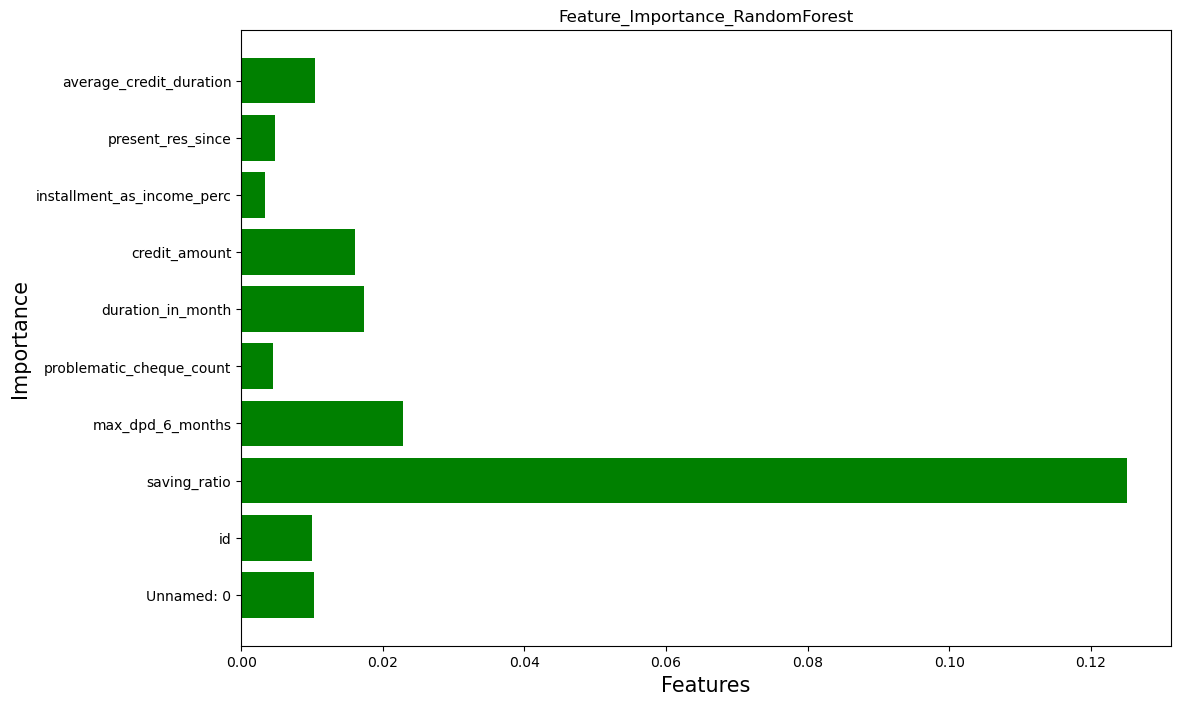

                                Feature  Importance
0                            Unnamed: 0    0.010277
1                                    id    0.009982
2                          saving_ratio    0.125078
3                      max_dpd_6_months    0.022811
4              problematic_cheque_count    0.004483
..                                  ...         ...
57        sme_history_begin_new company    0.001064
58           business_type_mean_encoded    0.003821
59           other_debtors_mean_encoded    0.002570
60                 purpose_mean_encoded    0.011522
61  sector_risk_capped_0.99_woe_encoded    0.000000

[62 rows x 2 columns]


In [73]:
dataset=train_data_corr_eliminated.select_dtypes(include=np.number)
target_column='default_flag'

Feature_importance_df = calculate_feature_importance(dataset, target_column, n_estimators=100)
print(Feature_importance_df)

The Length of the bar graph indicates the importance of the feature in preidction through random forest classifier

## SHAP values or SHAPELY additive explainations

Since the random forest classifier is a black box model with limited interpretability,SHAP (SHapley Additive exPlanations) is a game theory-based method to explain any machine learning model's predictions by assigning importance values (SHAP values) to each feature, showing how much it contributes to a specific outcome, positively or negatively, relative to a baseline
Calculating these values can help decide the best set of features that contributes to predict the the Outcome/Target variable
to be used in in the Random Forest Classifier.
How it Works

    -Game Theory Analogy: Treats feature contributions as players in a game, where the prediction is the total payoff. 
    -Fair Distribution: Calculates a feature's average marginal contribution across all possible combinations (coalitions) of features to determine its fair share of the prediction. 
    -Baseline: Uses the average model prediction (expected value) as the starting point. 
    -Additive Explanation: The sum of all SHAP values for a specific prediction equals the difference between the actual prediction and the baseline
SHAP values are model agnostic which means irrespective of the underlying model,explains local as well as global predictions, SHAP values  help interpret complex black box models by explaining feature importance on the predictions of the target data

lets apply the same on a logistic regression and a RandomForestRegressor model.

In [74]:
import shap
# We have already split the dataset into test and train using train_test_split functionality from the model_selection in sklearn
X= train_data_corr_eliminated.select_dtypes(include=np.number).drop('default_flag',axis=1)
y=train_data_corr_eliminated[target_column]
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X,y)
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X)
shap_values

array([[[ 0.00232235, -0.00232235],
        [ 0.0003359 , -0.0003359 ],
        [ 0.03976545, -0.03976545],
        ...,
        [-0.0002947 ,  0.0002947 ],
        [ 0.01238329, -0.01238329],
        [ 0.        ,  0.        ]],

       [[ 0.00183236, -0.00183236],
        [-0.00136147,  0.00136147],
        [ 0.03503888, -0.03503888],
        ...,
        [-0.00048117,  0.00048117],
        [-0.00297585,  0.00297585],
        [ 0.        ,  0.        ]],

       [[ 0.01322399, -0.01322399],
        [ 0.00231395, -0.00231395],
        [ 0.03739835, -0.03739835],
        ...,
        [-0.00067386,  0.00067386],
        [-0.01616118,  0.01616118],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.00220049, -0.00220049],
        [ 0.00414093, -0.00414093],
        [-0.14623673,  0.14623673],
        ...,
        [-0.00271692,  0.00271692],
        [-0.00921873,  0.00921873],
        [ 0.        ,  0.        ]],

       [[ 0.00443886, -0.00443886],
        [ 0.00546555, -0.00

In [90]:
shap_pd_true=shap_values[:,:,1]
shap_pd_true

array([[-0.00232235, -0.0003359 , -0.03976545, ...,  0.0002947 ,
        -0.01238329,  0.        ],
       [-0.00183236,  0.00136147, -0.03503888, ...,  0.00048117,
         0.00297585,  0.        ],
       [-0.01322399, -0.00231395, -0.03739835, ...,  0.00067386,
         0.01616118,  0.        ],
       ...,
       [-0.00220049, -0.00414093,  0.14623673, ...,  0.00271692,
         0.00921873,  0.        ],
       [-0.00443886, -0.00546555, -0.03700267, ...,  0.00035202,
         0.0054644 ,  0.        ],
       [-0.00263123, -0.00199777, -0.04147142, ...,  0.00027413,
        -0.00863807,  0.        ]], shape=(594, 62))

In [91]:
# Calculate mean absolute SHAP values for feature importance
shap_importance = pd.DataFrame(abs(shap_pd_true.mean(axis=0)), index=X.columns, columns=['SHAP Importance'])
# Sort features by importance
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)
shap_importance

,SHAP Importance
Net_Profit_Margin,1.841026e-02
ROA,6.182130e-03
sector_risk,5.933559e-03
ROE,4.168778e-03
saving_ratio,3.640217e-03
...,...
revenue_range_1m-5m,2.028547e-06
credit_history_delay in paying off in the past,7.388808e-08
boxcox_year,0.000000e+00
purpose_retraining,0.000000e+00


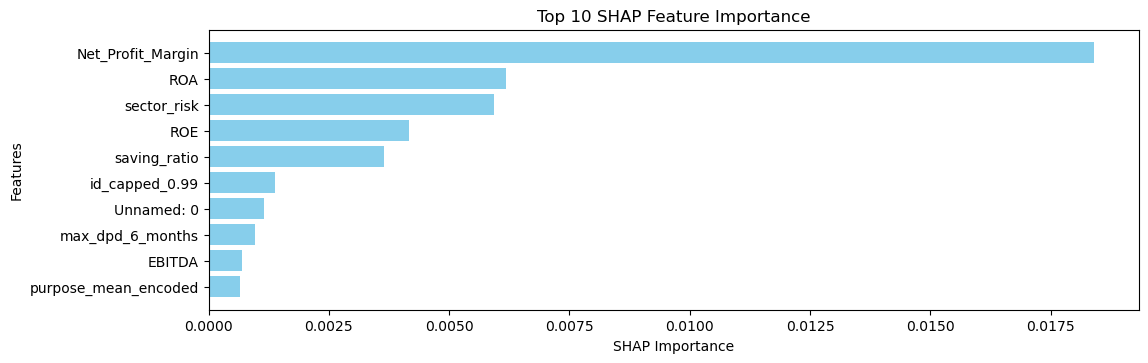

In [93]:
# Visualisation of SHAP importance
# Plot SHAP feature importance  for the first 10 features in the descending order of SHAP values
plt.figure(figsize=(12, 8))

# SHAP feature importance plot for the top 10 features
plt.subplot(2, 1, 1)
plt.barh(shap_importance.index[:10], shap_importance['SHAP Importance'].head(10), color='skyblue')
plt.xlabel('SHAP Importance')
plt.ylabel('Features')
plt.title('Top 10 SHAP Feature Importance')
plt.gca().invert_yaxis() # Inverts the y-axis from its default from max to min

# SHAP Dependency Plot
What It Shows:
Feature Effect: 

Reveals if higher/lower feature values generally increase or decrease the prediction. 

Interactions: The vertical spread reveals when the effect of one feature changes depending on the value of another (colored feature). 

Individual vs. Average Effects: Shows contributions for each instance.

Key Components of a SHAP Dependence Plot:

X-axis: The actual value of the feature being analyzed. 

Y-axis: The SHAP value (contribution) of that feature for each data point, indicating its impact on the model's output. 

Color (Optional): Another feature can be used for coloring to highlight interactions, showing how another variable modifies the relationship. 

Vertical Dispersion: The spread of points along the y-axis for a given x-value shows interaction effects with other features.

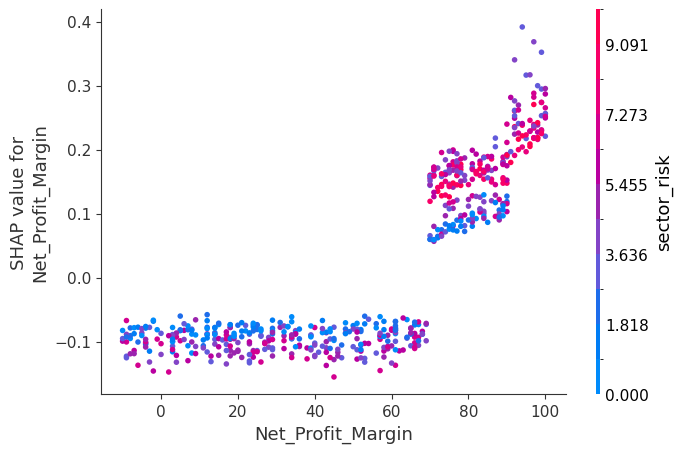

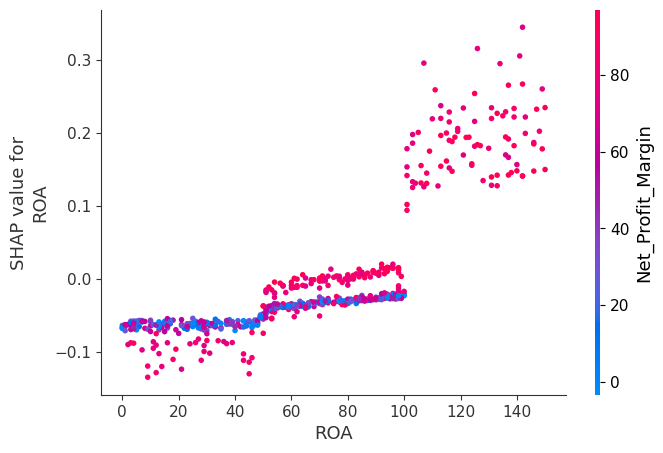

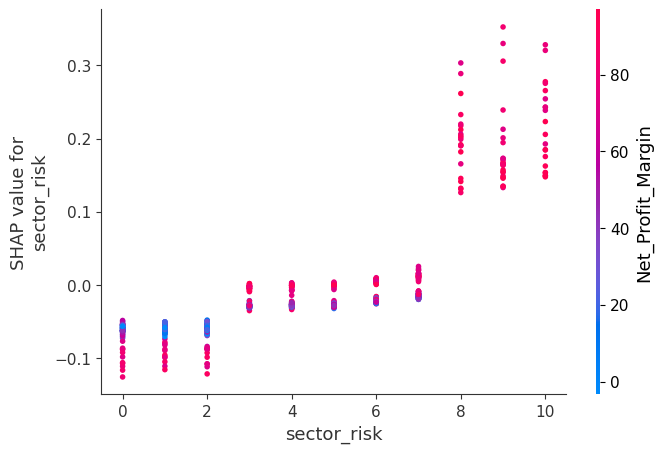

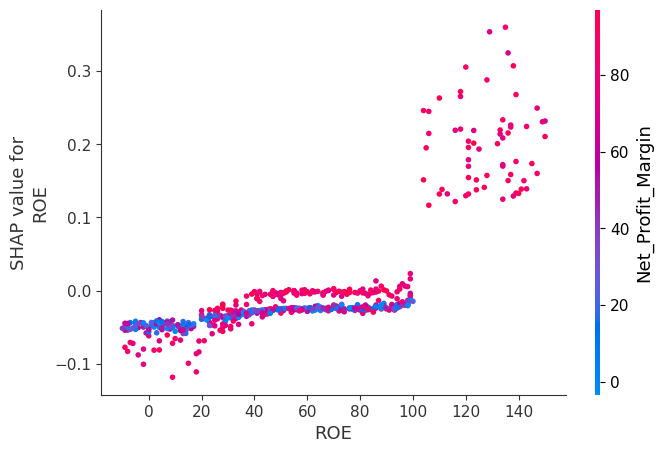

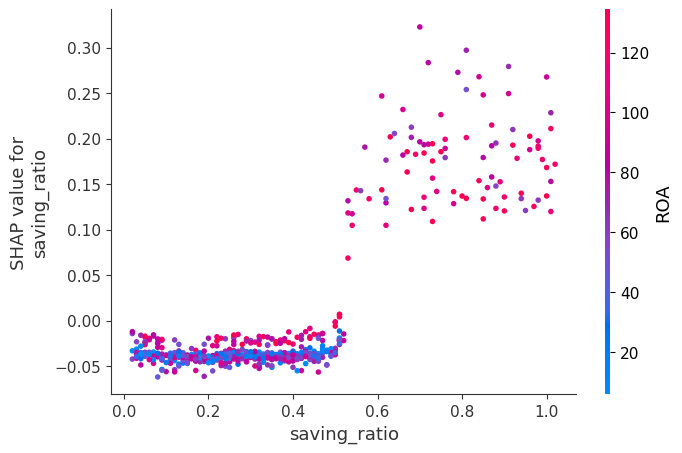

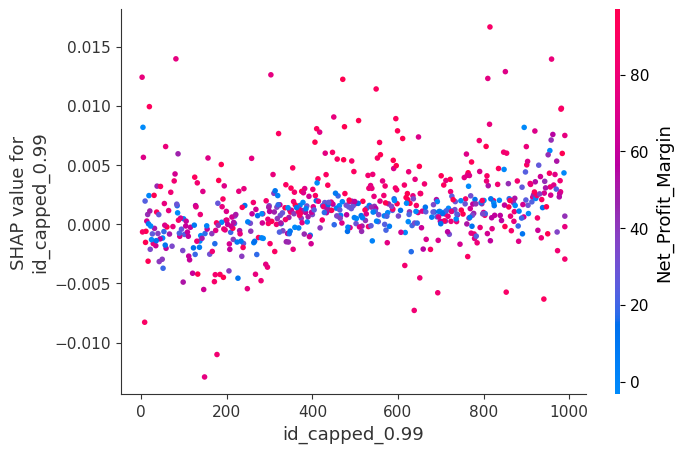

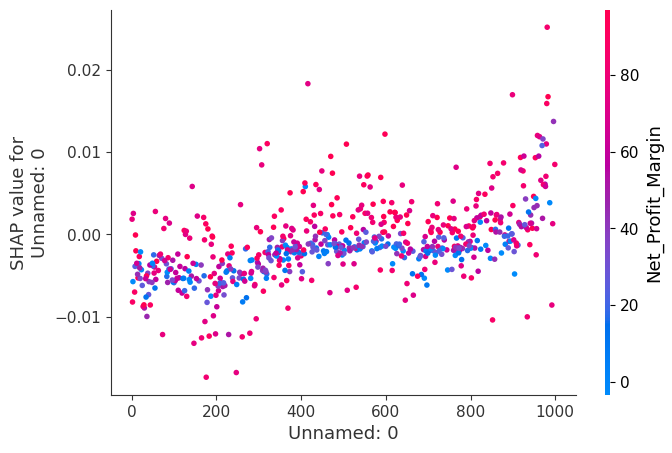

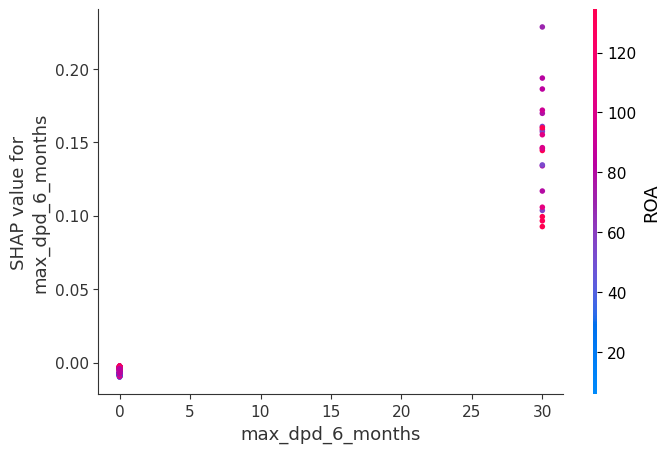

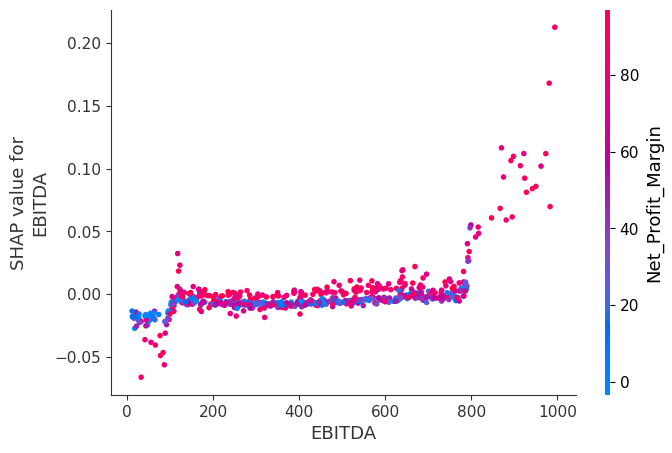

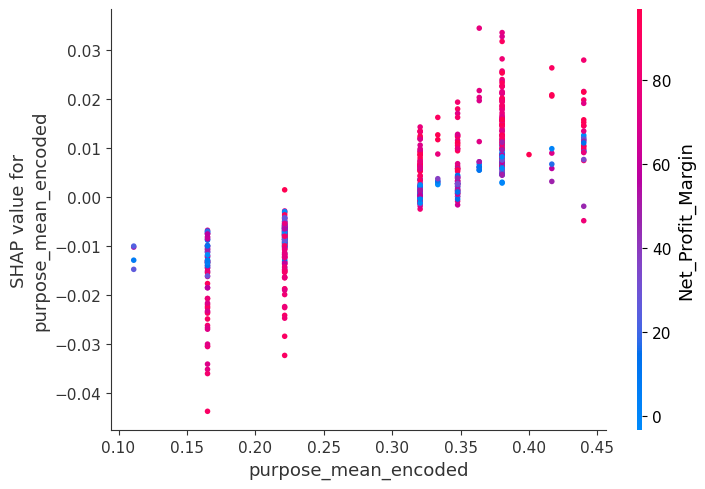

In [78]:
# SHAP dependence plots for the first 10 features
for i, feature in enumerate(shap_importance.index[:10]):
    shap.dependence_plot(feature, shap_pd_true, X, show=False)

plt.tight_layout()
plt.show()

# SHAP Beeswarm Plot
The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output. Each instance the given explanation is represented by a single dot on each feature row. The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature (shap_values.data[instance,feature]).By default the maximum number of features shown is ten, but this can be adjusted with the max_display parameter.

By default the features are ordered using shap_values.abs.mean(0), which is the mean absolute value of the SHAP values for each feature. This order however places more emphasis on broad average impact, and less on rare but high magnitude impacts. If we want to find features with high impacts for individual people we can instead sort by the max absolute value

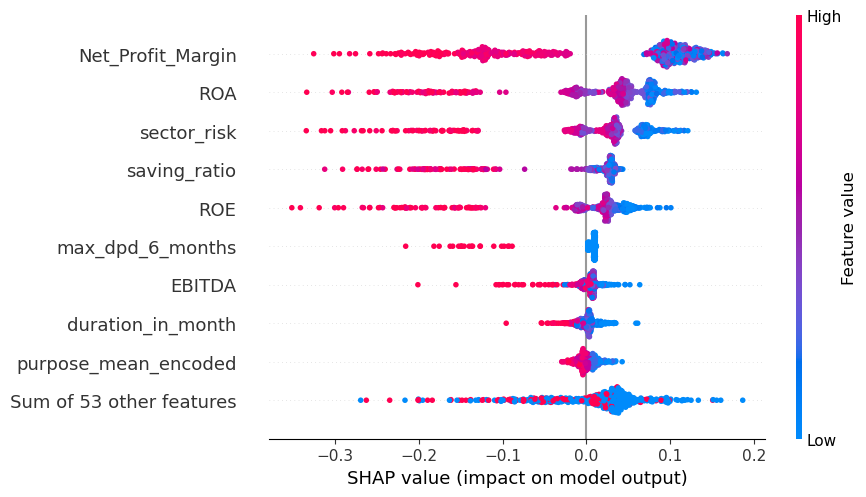

In [98]:
model=rfc.fit(X,y)
explainer=shap.Explainer(model,X)
shap_values=explainer(X)
shap_values_single_dim = shap_values[:, :, 0] # The beeswarm plot does not support plotting explanations with instances that have more than one dimension
shap.plots.beeswarm(shap_values_single_dim)

# Permutation Feature Importance
Permutation Feature Importance (PFI) is a model-agnostic technique to measure a feature's importance by shuffling its values and observing the resulting drop in model performance (score/accuracy), indicating how much the model relied on that feature for accurate predictions. If shuffling a feature significantly worsens the model's score, that feature is important; if the score barely changes, the feature is less crucial. It's great for black-box models but can struggle with highly correlated features, potentially underestimating their individual importance. 

In [79]:
# Calculate the Baseline Score: for RandomForestClassifier model
# Evaluate the model on the testing set (X_test and y_test) using the specified metric to get the baseline score.
# Initialize an Array to Store Importances:
# Create an array of zeros with the same length as the number of features to store the importance values.
#Permutation Feature Importance Calculation:

#For each feature:
#Create a copy of the testing set.
#Permute the feature values and calculate the model's performance on the permuted dataset.
#Compute the difference between the baseline score and the permuted score.
#Average the importance values over the specified number of repeats.

# Create a DataFrame to Store Feature Importances:

# Store the feature names and their corresponding importance values in a pandas DataFrame.
# Sort the DataFrame by the importance values in descending order.

# Plot the Top 10 Feature Importances:

# Create a horizontal bar plot of the top 10 features based on their permutation importance values.
# Label the x-axis as 'Permutation Feature Importance' and set the title of the plot to 'Top 10 Permutation Feature Importance'.
# Invert the y-axis to have the most important feature at the top.

# Return the Permutation Feature Importance DataFrame:

# The function should return the DataFrame containing the feature names and their corresponding permutation importance values.


In [80]:
X_test_copy=test_data_corr_eliminated.copy()
X_test_copy.drop(['date','year_month','default_flag'],axis =1,inplace=True)


In [81]:
def calculate_permutation_feature_importance(dataset,target_column,n_estimators):
    X= dataset.drop(columns=[target_column])
    y=dataset[target_column]
    rfc=RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X,y)
    
dataset=train_data_corr_eliminated.select_dtypes(include=np.number)
target_column='default_flag'
n_estimators=100

In [82]:
y_hat=rfc.predict(X_test_copy)
y_hat

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
from sklearn.metrics import accuracy_score
baseline_score=accuracy_score(y_test,y_hat)# Gives the Baseline score for PFI

In [84]:
feature_imp=[]
imp_cal=np.zeros(X_test_copy.shape[1])

In [85]:
feature_set=X_test_copy.columns
len(feature_set)

62

In [104]:
# PFI calc
  # Permutation feature importance
n_repeats=10
random_state=42
for i in range(X_test_copy.shape[1]):  
    # Permute the feature values
    for _ in range(n_repeats):
        np.random.seed(random_state)
        X_test_copy.iloc[:, i] = np.random.permutation(X_test_copy.iloc[:, i])
        permuted_score = accuracy_score(y_test, rfc.predict(X_test_copy))
        imp_cal[i] = imp_cal[i] + baseline_score - permuted_score
        # Average importance over repeats
        imp_cal[i] =imp_cal[i]/n_repeats

In [105]:
#  Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_test_copy.columns,
    'Importance': imp_cal
}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
14,ROE,0.047054
13,EBITDA,0.045633
15,ROA,0.045330
61,sector_risk_capped_0.99_woe_encoded,0.045316
56,sme_history_begin_4 <= ... < 7 years,0.045316
...,...,...
4,problematic_cheque_count,0.041834
10,credits_this_bank,0.041830
1,id,0.041830
0,Unnamed: 0,0.041830


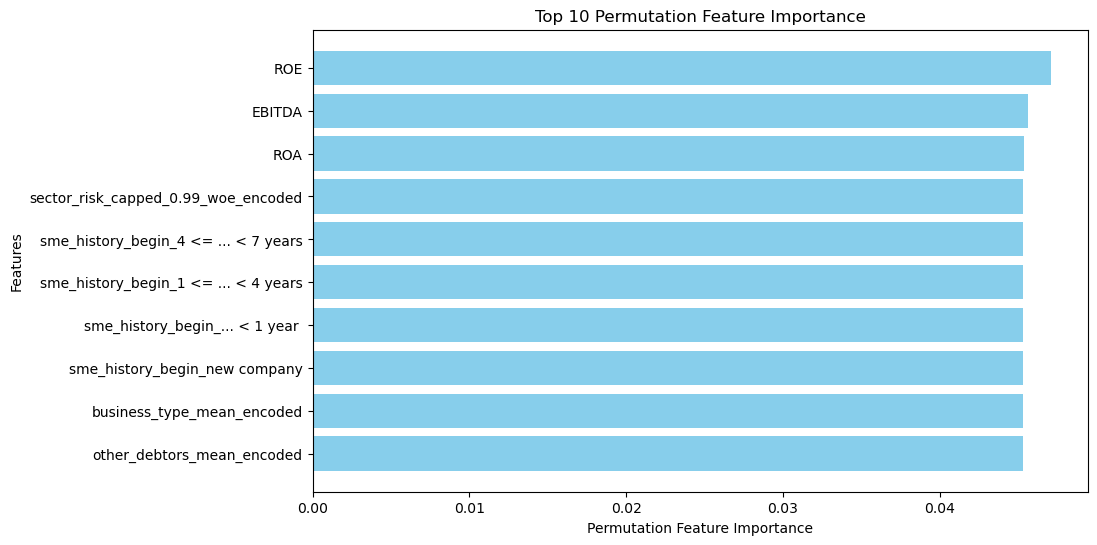

In [106]:
 # Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Permutation Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()